# Predicting Survival in Titanic Data Set

# Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  E mbarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
X = titanic.drop(['Survived','PassengerId','Ticket','Name','Cabin','E mbarked'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E mbarked        2
dtype: int64

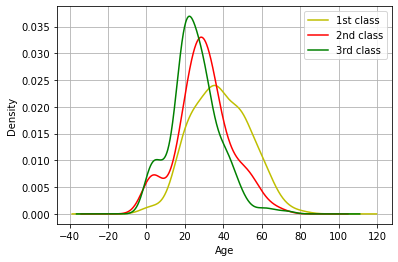

In [7]:
titanic[titanic.Pclass==1].Age.plot(kind='kde', color='y', label='1st class')
titanic[titanic.Pclass==2].Age.plot(kind='kde', color='r', label='2nd class')
titanic[titanic.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

# Function to replace NaN with the median value for each ticket class

In [8]:
def missing_age(dataset):
    for i in range(1,4):
        median_age=dataset[dataset["Pclass"]==i]["Age"].median()
        dataset["Age"]=dataset["Age"].fillna(median_age)
        return dataset

X = missing_age(X)

In [9]:
X.isnull().any()

Pclass    False
Sex       False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool

In [10]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,37.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [11]:
sex = {'female':0,'male':1}
X['Sex'] = X['Sex'].map(sex)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,37.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [12]:
## discretize Fare
pd.qcut(X["Fare"], 8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

In [13]:
X.loc[X["Fare"] <= 7.75, "Fare"] = 0
X.loc[(X["Fare"] > 7.75) & (X["Fare"] <= 7.91), "Fare"] = 1
X.loc[(X["Fare"] > 7.91) & (X["Fare"] <= 9.841), "Fare"] = 2
X.loc[(X["Fare"] > 9.841) & (X["Fare"] <= 14.454), "Fare"] = 3   
X.loc[(X["Fare"] > 14.454) & (X["Fare"] <= 24.479), "Fare"] = 4
X.loc[(X["Fare"] >24.479) & (X["Fare"] <= 31), "Fare"] = 5   
X.loc[(X["Fare"] > 31) & (X["Fare"] <= 69.487), "Fare"] = 6
X.loc[X["Fare"] > 69.487, "Fare"] = 7

In [14]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,0.0
1,1,0,38.0,1,0,7.0
2,3,0,26.0,0,0,2.0
3,1,0,35.0,1,0,6.0
4,3,1,35.0,0,0,2.0
...,...,...,...,...,...,...
886,2,1,27.0,0,0,3.0
887,1,0,19.0,0,0,5.0
888,3,0,37.0,1,2,4.0
889,1,1,26.0,0,0,5.0


In [15]:
X.loc[X["Age"] <= 9, "Age"] = 0
X.loc[(X["Age"] > 9) & (X["Age"] <= 19), "Age"] = 1
X.loc[(X["Age"] > 19) & (X["Age"] <= 29), "Age"] = 2
X.loc[(X["Age"] > 29) & (X["Age"] <= 39), "Age"] = 3
X.loc[X["Age"] > 39, "Age"] = 4

In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,2.0,1,0,0.0
1,1,0,3.0,1,0,7.0
2,3,0,2.0,0,0,2.0
3,1,0,3.0,1,0,6.0
4,3,1,3.0,0,0,2.0
...,...,...,...,...,...,...
886,2,1,2.0,0,0,3.0
887,1,0,1.0,0,0,5.0
888,3,0,3.0,1,2,4.0
889,1,1,2.0,0,0,5.0


# Dependent Variable

In [17]:
y = titanic["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting data into test and train dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=1)
X_train.shape, y_train.shape

((668, 6), (668,))

# Decision tree Classification 

In [19]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(random_state=1)
Dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
y_pred = Dtc.predict(X_test)

In [32]:
print((y_pred(len(y_pred),1), y_test(len(y_test),1)))

TypeError: 'numpy.ndarray' object is not callable